<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Script-setup" data-toc-modified-id="Script-setup-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Script setup</a></span></li><li><span><a href="#Data-directory-preparention" data-toc-modified-id="Data-directory-preparention-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data directory preparention</a></span></li><li><span><a href="#Data-file-preperation" data-toc-modified-id="Data-file-preperation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data file preperation</a></span><ul class="toc-item"><li><span><a href="#input-directory-(all-general-raw-data-files)" data-toc-modified-id="input-directory-(all-general-raw-data-files)-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span><code>input</code> directory (all general raw data files)</a></span></li><li><span><a href="#processed-directory-(all-data-files-produced-in-this-repository)" data-toc-modified-id="processed-directory-(all-data-files-produced-in-this-repository)-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span><code>processed</code> directory (all data files produced in this repository)</a></span></li></ul></li><li><span><a href="#Load-data-functions" data-toc-modified-id="Load-data-functions-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Load data functions</a></span></li><li><span><a href="#Load-data-sets" data-toc-modified-id="Load-data-sets-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Load data sets</a></span></li><li><span><a href="#Power-plant-CO2-Signals" data-toc-modified-id="Power-plant-CO2-Signals-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Power plant CO2 Signals</a></span><ul class="toc-item"><li><span><a href="#Plant-Level" data-toc-modified-id="Plant-Level-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Plant Level</a></span></li><li><span><a href="#Technology-Level" data-toc-modified-id="Technology-Level-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Technology Level</a></span></li><li><span><a href="#Country-level" data-toc-modified-id="Country-level-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Country level</a></span></li><li><span><a href="#Signal-analysis" data-toc-modified-id="Signal-analysis-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>Signal analysis</a></span></li><li><span><a href="#CO2-Signal-Example" data-toc-modified-id="CO2-Signal-Example-7.5"><span class="toc-item-num">7.5&nbsp;&nbsp;</span>CO2 Signal Example</a></span></li></ul></li><li><span><a href="#ENTSO-E-generation-per-technology-CO2-Signal" data-toc-modified-id="ENTSO-E-generation-per-technology-CO2-Signal-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>ENTSO-E generation per technology CO2 Signal</a></span><ul class="toc-item"><li><span><a href="#EF-preparation" data-toc-modified-id="EF-preparation-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>EF preparation</a></span></li><li><span><a href="#Plots" data-toc-modified-id="Plots-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Plots</a></span><ul class="toc-item"><li><span><a href="#CO2-Signal-Example" data-toc-modified-id="CO2-Signal-Example-8.2.1"><span class="toc-item-num">8.2.1&nbsp;&nbsp;</span>CO2 Signal Example</a></span></li><li><span><a href="#CO2-Duration-Curves" data-toc-modified-id="CO2-Duration-Curves-8.2.2"><span class="toc-item-num">8.2.2&nbsp;&nbsp;</span>CO2 Duration Curves</a></span></li><li><span><a href="#Carbon-Intensity-Heat-Map" data-toc-modified-id="Carbon-Intensity-Heat-Map-8.2.3"><span class="toc-item-num">8.2.3&nbsp;&nbsp;</span>Carbon Intensity Heat Map</a></span></li></ul></li></ul></li><li><span><a href="#ENTSO-E-Statistical-Factsheet-2018-in-Comma-Separated-Value-(CSV)-format" data-toc-modified-id="ENTSO-E-Statistical-Factsheet-2018-in-Comma-Separated-Value-(CSV)-format-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>ENTSO-E Statistical Factsheet 2018 in Comma Separated Value (CSV) format</a></span></li><li><span><a href="#ENTSO-E-Power-Stats-generation-per-technology-CO2-Signal" data-toc-modified-id="ENTSO-E-Power-Stats-generation-per-technology-CO2-Signal-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>ENTSO-E Power Stats generation per technology CO2 Signal</a></span></li><li><span><a href="#Compair-Bottom-Up-and-Top-down" data-toc-modified-id="Compair-Bottom-Up-and-Top-down-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Compair Bottom Up and Top down</a></span></li><li><span><a href="#Plotting-CI" data-toc-modified-id="Plotting-CI-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Plotting CI</a></span></li><li><span><a href="#Export-final-CO2-signals" data-toc-modified-id="Export-final-CO2-signals-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Export final CO2 signals</a></span></li><li><span><a href="#Plottting" data-toc-modified-id="Plottting-14"><span class="toc-item-num">14&nbsp;&nbsp;</span>Plottting</a></span></li></ul></div>

# Introduction

This notebook uses the calculated EFs to design an hourly CO2 emission signal for EU countries.

# Script setup

In [1]:
import os
import logging

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from IPython.display import Image 
import datetime
from matplotlib.lines import Line2D

#GEO
import geopandas as gpd
#from pyproj import CRS
#from pyproj import Transformer
#from shapely.geometry import Point

%matplotlib inline
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [15, 10]
sns.set_theme()

#helpers
from helpers import change_ENTSOE_ProductionTypeName

# Data directory preparention

Create input, processed and output folders if they don't exist
If the paths are relative, the corresponding folders will be created inside the current working directory.
- input -> all needed input data
- processed -> save point and exchange with other scripts
- output -> final emission factors

In [2]:
input_directory_path = os.path.join('input')
processed_directory_path = 'processed'
output_directory_path = os.path.join('output')

os.makedirs(input_directory_path, exist_ok=True)
os.makedirs(processed_directory_path, exist_ok=True)
os.makedirs(output_directory_path, exist_ok=True)

# Data file preperation

## `input` directory (all general raw data files)

- 1) ENTSO-E production per type
Production per type from ENTSO-E
Original data: ENTSO-E Transparency Platform, Actual Generation per Production Type Available online: 
https://transparency.entsoe.eu/generation/r2/actualGenerationPerProductionType/show
Processed with the following script that converts the data to hourly resolution (private script from INATECH):


 File - > time_series_60min_multiindex.csv - > generation per technology
 
- 2) ENTSO-E production per unit
Production per Unit from ENTSO-E
Original data: ENTSO-E Transparency Platform, Actual Generation per Generation Unit Available online: https://transparency.entsoe.eu/generation/r2/actualGenerationPerGenerationUnit/show (accessed on Apr 29, 2020).
Processed with the following script that converts the data to hourly resolution (private script from INATECH):
https://github.com/INATECH-CIG/entso-e_GenerationOutputPerUnit

File - > gen_data.csv -> hourly generation data per unit

In [3]:
# Checks if the the input directories are empty or not
# Checks all filenames in the input directory

if not os.listdir(input_directory_path) :
    print("The directory for the bootom up method is empty. Please provide the data to the directory as described in the instructions above.")


filenames = [os.path.join(input_directory_path, fn) for fn in os.listdir(input_directory_path)]

print(filenames)

['input\\Bootom_up_methode', 'input\\CO2_Signal', 'input\\ember_EF.csv', 'input\\entso.csv', 'input\\entsoe-statistical-factsheet-2018-stacked.csv', 'input\\entsoe_gen_type_hourly_table.csv', 'input\\entsoe_gen_type_hourly_table1.csv', 'input\\entso_gen_type_hourly_table_scaled.csv', 'input\\entso_scaled.csv', 'input\\gen_data_2015.csv', 'input\\gen_data_2016.csv', 'input\\gen_data_2017.csv', 'input\\gen_data_2018.csv', 'input\\Matching', 'input\\MDV_table.csv', 'input\\time_series_60min_multiindex.csv', 'input\\top_down_methode', 'input\\unit_data_2015.csv', 'input\\unit_data_2016.csv', 'input\\unit_data_2017.csv', 'input\\unit_data_2018.csv']


## `processed` directory (all data files produced in this repository)

- 1) EF per type and county

File - > EF_bottom_up_methode.csv

- 2) EF per unit

File -> generation_unit_EF_bottom_up_methode.csv

In [4]:
# Checks if the the input directories are empty or not
# Checks all filenames in the input directory

if not os.listdir(processed_directory_path) :
    print("The directory for the CO2 Signal is empty. Please provide the data to the directory as described in the instructions above.")


filenames = [os.path.join(processed_directory_path, fn) for fn in os.listdir(processed_directory_path)]

print(filenames)

['processed\\CI_bottom_up_methode.csv', 'processed\\CI_MAP_AP_CHP_heat_top_down.csv', 'processed\\CI_MAP_AP_without_heat_top_down.csv', 'processed\\EF_bottom_up_methode.csv', 'processed\\generation_unit_EF_bottom_up_methode.csv', 'processed\\Matching_Entso_EUTL_EU.csv', 'processed\\_CO2_intensity_by_technology.png']


# Load data functions

In [5]:
def load_generation_per_unit(path, fn):
    """
    Load the ENTSO-E gernation per unit data.
        
    Parameters
    ----------
    path: str
        path to data
    fn : str
        filename
        
    """
    
    generation = pd.read_csv(os.path.join(path, fn),sep = ',',index_col=0,parse_dates=True)
    
    return generation

def load_unit_CO2_data(path, fn):
    """
    Own generation unit information with CO2 information per unit
        
    Parameters
    ----------
    path: str
        path to data
    fn : str
        filename
        
    """
    
    df = pd.read_csv(os.path.join(path, fn),sep = ',',index_col=0)
    
    # set name for the index
    #df.index.set_names('eic_g', inplace=True)

    return df

def load_EF(path, fn):
    """
    Own generation EF per tech and country
        
    Parameters
    ----------
    path: str
        path to data
    fn : str
        filename
        
    """
    
    df = pd.read_csv(os.path.join(path, fn),sep = ',',index_col=[0,1])
    
    return df

def load_timeseries_ENTSOE(path, fn):
    """
    Read generation data from time-series package own modification.


    Parameters
    ----------
    path : TYPE
        DESCRIPTION.
    fn : TYPE
        DESCRIPTION.

    Returns
    -------
    generation : TYPE
        DESCRIPTION.

    """
   
    generation = (pd.read_csv(os.path.join(path, fn), index_col=[0], header=[0, 1], parse_dates=True)
                    .dropna(how="all", axis=0))
       
    
    return generation

# Load data sets

#### Load power plant generation data

In [6]:
generation_per_unit = load_generation_per_unit(input_directory_path, 'gen_data_2018.csv')

#### Load power plant emission info data

In [7]:
generation_unit_info = load_unit_CO2_data(processed_directory_path, 'generation_unit_EF_bottom_up_methode.csv')

#### Load ENTSO-E generation per type

In [8]:
entsoe_gen_type = load_timeseries_ENTSOE(input_directory_path, 'entso_scaled.csv')

#### Load EF per technology

In [9]:
EF = load_EF(processed_directory_path, 'EF_bottom_up_methode.csv')

In [10]:
EF.head(10)

EF Verified_EF  EF_round_in_kwh
MapCode ProductionTypeName                                       
AT      gas                 0.360910        True           360.91
        hard_coal           1.069627        True          1069.63
BE      gas                 0.389955        True           389.95
CZ      hard_coal           1.010505        True          1010.50
        lignite             0.932336        True           932.34
DE      gas                 0.409985        True           409.98
        hard_coal           0.909259        True           909.26
        lignite             1.135463        True          1135.46
        other_fossil        1.620500        True          1620.50
DK      gas                 0.456925       False           456.93

#### Filter generation set to generation info data

In [11]:
generation_per_unit = generation_per_unit[generation_unit_info.index]

# Power plant CO2 Signals

In this section we build CO2 signal out of the used per power plant generation data. We limit the used generation to the generation units where we where able to calculated EFs.

In [12]:
generation_per_unit = generation_per_unit[generation_unit_info.index]

In [13]:
generation_per_unit.head(5)

,14WENERGIEAGWT4S,45W000000000032T,45W000000000033R,45W000000000034P,45W000000000040U,45W000000000035N,45W000000000099Y,45W000000000038H,14W-GEN-DO3----F,14W-WML-M1-----G,...,30WROVIROVI3---K,30WROVIROVI6---5,48W000000GYAR-15,17W100P100P0171I,48W00000EGGPS-1X,48W00000EGGPS-4R,48W00000EGGPS-3T,48W00000EGGPS-2V,48W000000SUTB-1P,48W000000DEEP-1N
2018-01-01 00:00:00,0.0,20.53,0.0,0.42,0.0,48.83,0.0,118.23,0.0,150.65,...,254.1,233.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-01 01:00:00,0.0,19.81,0.0,0.39,0.0,48.96,0.0,103.25,0.0,149.28,...,229.4,207.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-01 02:00:00,0.0,19.63,0.0,0.42,0.0,49.03,0.0,102.62,0.0,149.05,...,179.5,154.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-01 03:00:00,0.0,22.39,0.0,0.40,0.0,48.93,0.0,103.04,0.0,148.85,...,180.4,155.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-01 04:00:00,0.0,23.08,0.0,0.42,0.0,49.05,0.0,80.15,0.0,149.00,...,184.0,159.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
generation_unit_info.head(5)

,MapCode,EUTL_countrycode,ProductionTypeName,AreaCode,AreaName,AreaTypeCode,InstalledGenCapacity,PowerSystemResourceName,ProductionUnitEIC,duplicate_count,...,VERIFIED_EMISSIONS_2009,ALLOCATION_2008,VERIFIED_EMISSIONS_2008,ACCOUNT_CLOSURE,side_generation_2018,PP_emissions_2018,PP_EF2018,EF_2018_validation,Tech_EF,Country_EF
eic_g,,,,,,,,,,,,,,,,,,,,,
14WENERGIEAGWT4S,AT,AT,gas,10YAT-APG------L,APG CA,CTA,400.0,Kraftwerk Timelkam GUD,14WENERGIE--WT02,2.0,...,340026,218704,103553,OPEN,685235.67,2.672040e+05,0.389945,True,0.360910,0.427776
45W000000000032T,DK,DK,hard_coal,10Y1001A1001A796,Energinet CA,CTA,147.0,Asnaesvaerket 2,45V000000000011E,1.0,...,2430356,1765318,2484733,OPEN,770018.30,2.501768e+05,1.140746,True,0.959711,0.934412
45W000000000033R,DK,DK,hard_coal,10Y1001A1001A796,Energinet CA,CTA,640.0,Asnaesvaerket 5,45V000000000011E,1.0,...,2430356,1765318,2484733,OPEN,770018.30,6.282182e+05,1.140746,True,0.959711,0.934412
45W000000000034P,DK,DK,hard_coal,10Y1001A1001A796,Energinet CA,CTA,250.0,Amagervaerket 3,45V000000000012C,1.0,...,1684995,1250995,1089604,OPEN,1060165.23,1.038454e+06,0.979521,True,0.959711,0.934412
45W000000000040U,DK,DK,hard_coal,10Y1001A1001A796,Energinet CA,CTA,377.0,Esbjergvaerket 3,45V0000000000164,1.0,...,1318927,1051489,1158930,OPEN,1193633.83,1.066679e+06,0.893640,True,0.959711,0.934412


## Plant Level

In [15]:
CO2_emission_per_unit_EF = generation_per_unit.multiply((generation_unit_info.PP_EF2018), axis='columns')

In [16]:
CO2_emission_per_unit_EF.dropna(axis=1, inplace=True)

In [17]:
CO2_emission_per_unit_EF.sum(axis=1).describe()

count      8760.000000
mean      61078.129287
std       14109.328934
min           0.000000
25%       50916.721903
50%       60915.574211
75%       70708.449992
max      101403.163210
dtype: float64

## Technology Level

In [18]:
CO2_emission_per_tech_EF = generation_per_unit.multiply((generation_unit_info.Tech_EF), axis='columns')

In [19]:
CO2_emission_per_tech_EF.dropna(axis=1, inplace=True)

In [20]:
CO2_emission_per_tech_EF.sum(axis=1).describe()

count      8760.000000
mean      61078.129287
std       14182.794133
min           0.000000
25%       50904.488027
50%       60916.623864
75%       70709.113890
max      101320.470942
dtype: float64

## Country level

In [21]:
CO2_emission_per_country_EF = generation_per_unit.multiply((generation_unit_info.Country_EF), axis='columns')

In [22]:
CO2_emission_per_country_EF.dropna(axis=1, inplace=True)

In [23]:
CO2_emission_per_country_EF.sum(axis=1).describe()

count      8760.000000
mean      61078.129287
std       15407.778432
min           0.000000
25%       49512.546357
50%       60592.237024
75%       71682.427239
max      103350.065109
dtype: float64

## Signal analysis 

#### Scatter Plot

In [24]:
Carbon_intensitiy = pd.DataFrame()
Carbon_intensitiy['unit_EF'] = ((CO2_emission_per_unit_EF * 1000000).sum(axis=1) / (generation_per_unit * 1000).sum(axis=1))
Carbon_intensitiy['tech_EF'] = ((CO2_emission_per_tech_EF * 1000000).sum(axis=1) / (generation_per_unit * 1000).sum(axis=1))
Carbon_intensitiy['country_EF'] = ((CO2_emission_per_country_EF * 1000000).sum(axis=1) / (generation_per_unit * 1000).sum(axis=1))
Carbon_intensitiy['diff_norm_unit_vs_tech'] = (Carbon_intensitiy['unit_EF'] - Carbon_intensitiy['tech_EF']) / Carbon_intensitiy['tech_EF']
Carbon_intensitiy['diff_norm_unit_vs_country'] = (Carbon_intensitiy['unit_EF'] - Carbon_intensitiy['country_EF']) / Carbon_intensitiy['country_EF']

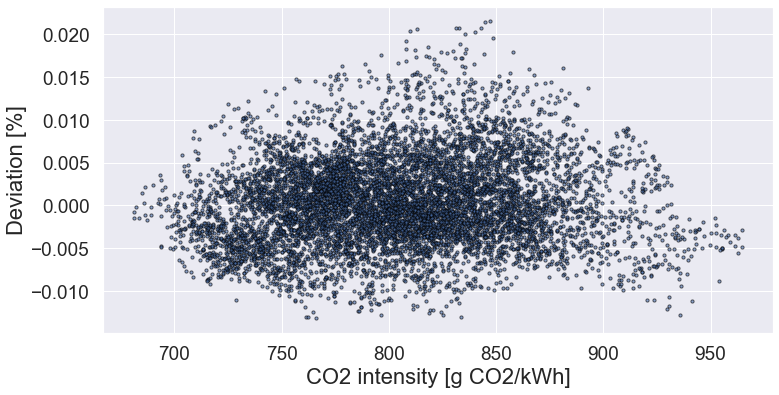

In [25]:
Carbon_intensitiy

fig,ax = plt.subplots(1,1)
    
fig.set_size_inches(12,6)


Carbon_intensitiy.plot(kind='scatter', x="tech_EF", y="diff_norm_unit_vs_tech", ax=ax, alpha=0.6, s=10, edgecolor='black', color='b')

ax.set_ylabel("Deviation [%]", fontsize=22)
ax.set_xlabel("CO2 intensity [g CO2/kWh]" , fontsize=22)

ax.tick_params(axis='x',labelsize=19)
ax.tick_params(axis='y',labelsize=19)

pass

In [26]:
fig.savefig(os.path.join(output_directory_path + '/_CO2_intensity_deviation_tech_vs_unit.png'))

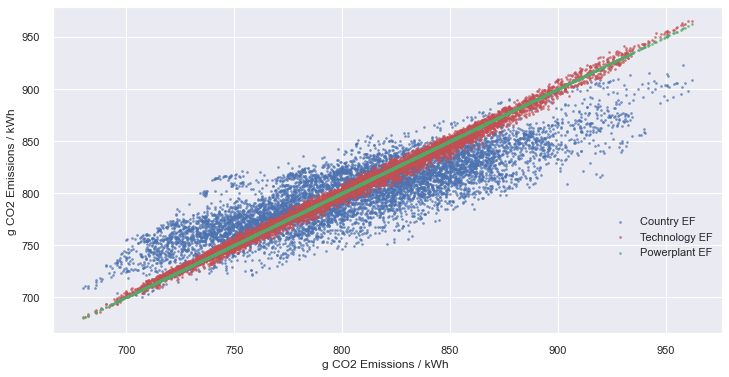

In [27]:
fig,ax = plt.subplots(1,1)
    
fig.set_size_inches(12,6)


Carbon_intensitiy.plot(kind='scatter', x="unit_EF", y="country_EF", ax=ax, alpha=0.6, color='b', s=3)

Carbon_intensitiy.plot(kind='scatter', x="unit_EF", y="tech_EF", ax=ax, alpha=0.6, color='r', s=3)

Carbon_intensitiy.plot(kind='scatter', x="unit_EF", y="unit_EF", ax=ax, alpha=0.6, color='g', s=3)



ax.set_ylabel("g CO2 Emissions / kWh ")
ax.set_xlabel("g CO2 Emissions / kWh ")

ax.legend(['Country EF', 'Technology EF', 'Powerplant EF'] ,loc='lower right', bbox_to_anchor=(1.0, 0.2))

In [28]:
Carbon_intensitiy_per_country_unit_EF = ((CO2_emission_per_unit_EF * 1000000).groupby(generation_unit_info.MapCode, axis=1).sum()) / (generation_per_unit * 1000).groupby(generation_unit_info.MapCode, axis=1).sum()
Carbon_intensitiy_per_country_tech_EF = (CO2_emission_per_tech_EF * 1000000).groupby(generation_unit_info.MapCode, axis=1).sum() / (generation_per_unit * 1000).groupby(generation_unit_info.MapCode, axis=1).sum()
Carbon_intensitiy_per_country_country_EF = (CO2_emission_per_country_EF * 1000000).groupby(generation_unit_info.MapCode, axis=1).sum() / (generation_per_unit * 1000).groupby(generation_unit_info.MapCode, axis=1).sum()

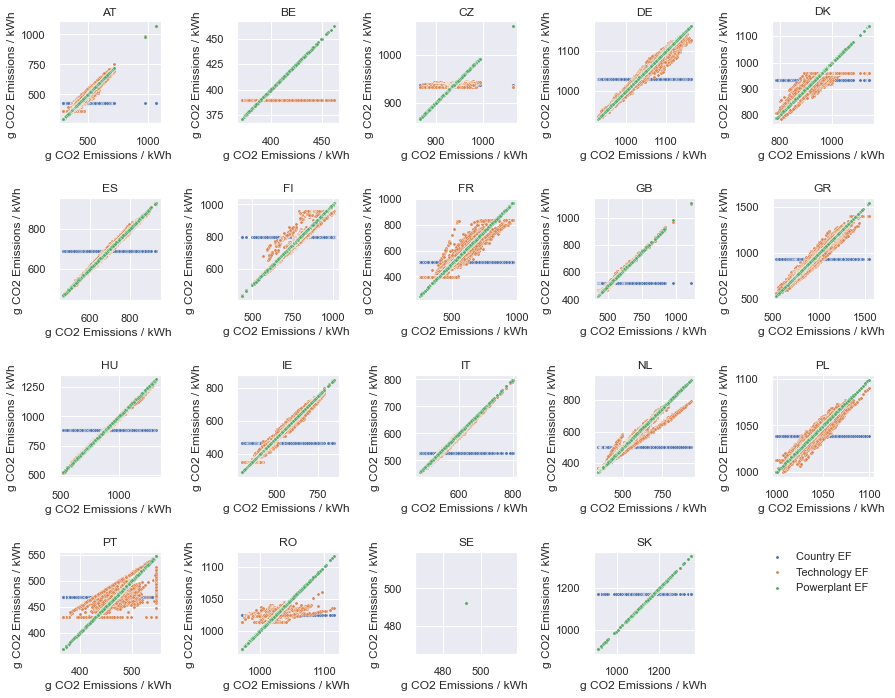

In [29]:
n_graphs = len(Carbon_intensitiy_per_country_unit_EF.columns)
n_cols = 5
    
if n_graphs % n_cols == 0:
    n_rows = n_graphs // n_cols
else:
    n_rows = n_graphs // n_cols + 1
    
    
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)

fig.delaxes(axes[3][4])

size = 2.5

fig.set_size_inches(size*n_cols,size*n_rows)
    
    
for i, country in enumerate(Carbon_intensitiy_per_country_unit_EF.columns):
    i_row = i // n_cols
    i_col = i % n_cols
        
    ax = axes[i_row,i_col]
    
    ax.set(aspect='equal')
    
    sns.scatterplot(x=Carbon_intensitiy_per_country_unit_EF.loc[:,country], y=Carbon_intensitiy_per_country_country_EF.loc[:,country], s=10, ax=ax)
    sns.scatterplot(x=Carbon_intensitiy_per_country_unit_EF.loc[:,country], y=Carbon_intensitiy_per_country_tech_EF.loc[:,country], s=10, ax=ax)
    sns.scatterplot(x=Carbon_intensitiy_per_country_unit_EF.loc[:,country], y=Carbon_intensitiy_per_country_unit_EF.loc[:,country], s=10, ax=ax)
    
        #max_lim = (max(entso_DE.loc[:,tech].max(),generation_DE.loc[:,tech].max())//1000)*1000+1000
        #if max_lim < 0:
        #    max_lim = 0
        
        #min_lim = (min(entso_DE.loc[:,tech].min(),generation_DE.loc[:,tech].min())//1000)*1000-1000
        #if min_lim < 0:
        #    min_lim = 0
    
    ax.set_title(country)
        #ax.set_xlim(min_lim,max_lim)
        #ax.set_ylim(min_lim,max_lim)
        
    ax.set_xlabel("g CO2 Emissions / kWh ")
    ax.set_ylabel("g CO2 Emissions / kWh ")
    
    fig.tight_layout()
    
ax.legend(['Country EF', 'Technology EF', 'Powerplant EF'] ,loc='lower right', bbox_to_anchor=(2.8, 0.5))

#### EF distribution

Text(0.5, 0, 'Country')

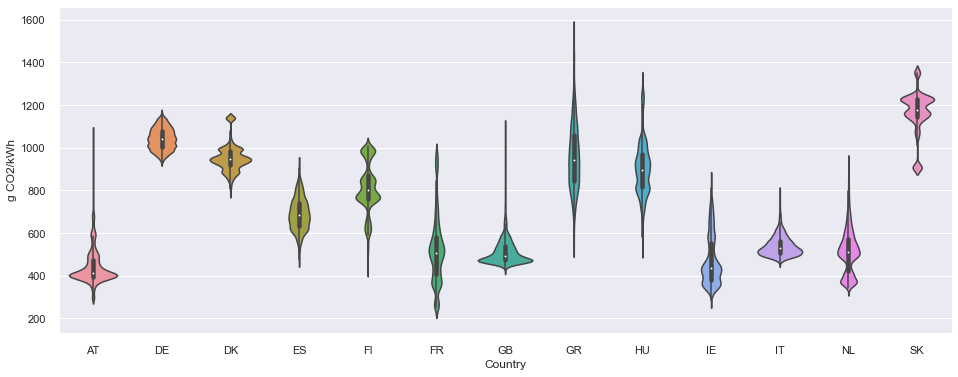

In [30]:
# per unit EF
fig,ax = plt.subplots(1,1)
    
fig.set_size_inches(16,6)
ax = sns.violinplot(data=Carbon_intensitiy_per_country_unit_EF[['AT', 'DE', 'DK', 'ES', 'FI', 'FR', 'GB', 'GR', 'HU', 'IE',
       'IT', 'NL', 'SK']])#,'BE']])

ax.set_ylabel("g CO2/kWh")
ax.set_xlabel("Country")

Text(0.5, 0, 'Country')

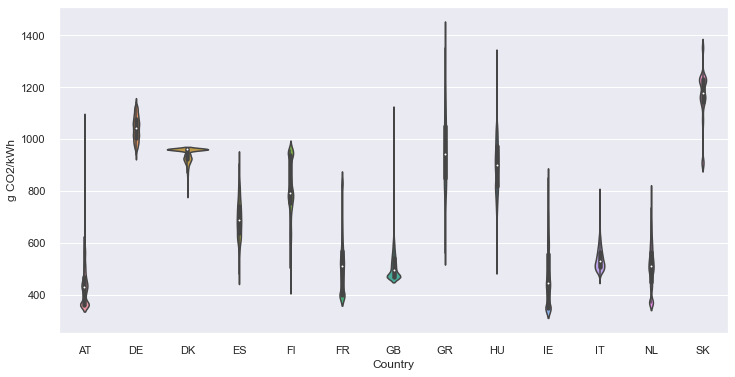

In [31]:
# per tech ef
fig,ax = plt.subplots(1,1)
    
fig.set_size_inches(12,6)

ax = sns.violinplot(data=Carbon_intensitiy_per_country_tech_EF[['AT', 'DE', 'DK', 'ES', 'FI', 'FR', 'GB', 'GR', 'HU', 'IE',
       'IT', 'NL', 'SK']])#,'BE']])

ax.set_ylabel("g CO2/kWh")
ax.set_xlabel("Country")

Text(0.5, 0, 'Country')

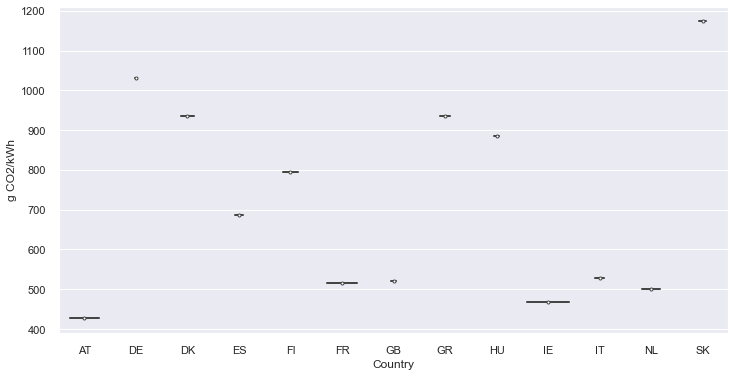

In [32]:
# per country EF
fig,ax = plt.subplots(1,1)
    
fig.set_size_inches(12,6)

ax = sns.violinplot(data=Carbon_intensitiy_per_country_country_EF[['AT', 'DE', 'DK', 'ES', 'FI', 'FR', 'GB', 'GR', 'HU', 'IE',
       'IT', 'NL', 'SK']])#,'BE']])

ax.set_ylabel("g CO2/kWh")
ax.set_xlabel("Country")

## CO2 Signal Example

The following plot shows an example of the three generated CO2 Signals

In [33]:
def plot_production_profile(generation, CO2_emission_per_unit_EF, CO2_emission_per_tech_EF, CO2_emission_per_country_EF, generators, countries, start, end):
    
    # load and filter data
    generators = generators[generators.MapCode == countries]
    generation = generation[generators.index]
    CO2_emission_per_unit_EF = CO2_emission_per_unit_EF[generators.index]
    CO2_emission_per_tech_EF = CO2_emission_per_tech_EF[generators.index]
    CO2_emission_per_country_EF = CO2_emission_per_country_EF[generators.index]
    
    # sum technologies
    generation_car =  generation.groupby(generators.ProductionTypeName, axis=1).sum()
    
    # sum Emissions
    CO2_emission_per_unit_EF = CO2_emission_per_unit_EF.sum(axis=1)
    CO2_emission_per_tech_EF = CO2_emission_per_tech_EF.sum(axis=1)
    CO2_emission_per_country_EF = CO2_emission_per_country_EF.sum(axis=1)
    
    # Carbon intensity
    Carbon_intensitiy_unit_EF = (CO2_emission_per_unit_EF * 1000000) / ((generation_car * 1000).sum(axis=1))
    Carbon_intensitiy_tech_EF = (CO2_emission_per_tech_EF * 1000000) / ((generation_car * 1000).sum(axis=1))
    Carbon_intensitiy_country_EF = (CO2_emission_per_country_EF * 1000000) / ((generation_car * 1000).sum(axis=1))
    
    #plotting
    import seaborn as sns

    sns.set(style="whitegrid")

    colors = {'gas': '#b20101',
              'biomass': '#0c6013',
              'hard_coal': '#707070',
              'geothermal': '#ba91b1',
              'lignite': '#9e5a01',
              'nuclear': '#ff9000',
              'oil': '#262626',
              'other_fossil': '#d35050',
              'waste': '#68896b',
              'onwind': '#235ebc',
              'offwind': '#6895dd',
              'solar': '#f9d002',
              'PHS': '#08ad97',
              'hydro': '#08ad97',
              'ror': '#4adbc8',
              'load': '#ea048a'}

    generation_car = generation_car.loc[start:end]
    Carbon_intensitiy_unit_EF = Carbon_intensitiy_unit_EF.loc[start:end]
    Carbon_intensitiy_tech_EF = Carbon_intensitiy_tech_EF.loc[start:end]
    Carbon_intensitiy_country_EF = Carbon_intensitiy_country_EF.loc[start:end]


    #order of col
    #cols = ['lignite', 'hard_coal',  'gas']#, 'other_fossil']

    #p_by_carrier = p_by_carrier[cols]



    fig,ax = plt.subplots(1,1)

    fig.set_size_inches(12,6)

    generation_car.plot(kind="area",
                        ax=ax,
                        linewidth=0,
                        color=[colors[col] for col in generation_car.columns],
                        alpha=0.7)



    ax.set_ylabel("Production [MW]")
    ax.set_xlabel("Date")
    ax.legend(loc='upper right', bbox_to_anchor=(1.0, 0.5))

    #ax3 = ax.twinx()
    Carbon_intensitiy_unit_EF.plot(ax=ax, secondary_y=True, legend=False)


    Carbon_intensitiy_tech_EF.plot(ax=ax, secondary_y=True, legend=False)

    Carbon_intensitiy_country_EF.plot(ax=ax, secondary_y=True, legend=False)

    ax.right_ax.set_ylabel("Emission intensity [g CO2 / kWh]")

    #ax.set_xlim(0,snapLength-1)
    #ax.set_ylim(0,150000)
    #ax.right_ax.set_ylim(0,0.1)
    plt.tight_layout()
    
    return

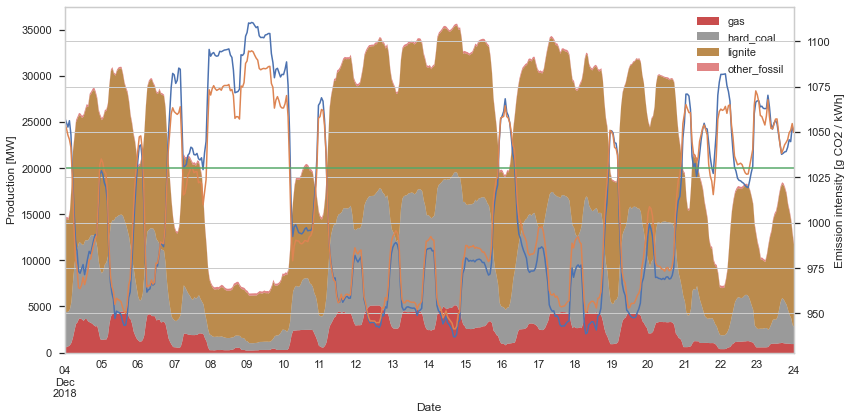

In [34]:
start = datetime.date(2018, 12, 4)
end = datetime.date(2018, 12, 24)

#Carbon_intensitiy_per_country_unit_EF
#Carbon_intensitiy_per_country_tech_EF
#Carbon_intensitiy_per_country_country_EF

plot_production_profile(generation_per_unit, CO2_emission_per_unit_EF, CO2_emission_per_tech_EF, CO2_emission_per_country_EF, generation_unit_info, 'DE', start, end)


# ENTSO-E generation per technology CO2 Signal

In this section we using the country specific EF for generating an CO2 emission signal for all EU countries. The production data are based on the production per type data from ENTSO-E

In [35]:
# take a look at the generation data
entsoe_gen_type.head(5)

region                         AT                                      \
variable                  biomass        gas   hard_coal        hydro   
utc_timestamp                                                           
2018-01-01 00:00:00+00:00     0.0  85.185998  189.813350  3633.105979   
2018-01-01 01:00:00+00:00     0.0  83.986195  188.547928  3557.076855   
2018-01-01 02:00:00+00:00     0.0  82.786393  188.547928  3439.774779   
2018-01-01 03:00:00+00:00     0.0  86.385801  188.547928  3432.171866   
2018-01-01 04:00:00+00:00     0.0  89.985209  188.547928  3616.814024   

region                                                                     \
variable                  other_fossil other_renewable solar wind_onshore   
utc_timestamp                                                               
2018-01-01 00:00:00+00:00   376.712329             NaN   0.0   767.537636   
2018-01-01 01:00:00+00:00   376.712329             NaN   0.0   854.254629   
2018-01-01 02:00:00+00:00   376.712329             NaN   0.0   638.384669   
2018-01-01 03:00:00+00:00   376.712329             NaN   0.0   417.902102   
2018-01-01 04:00:00+00:00   376.712329             NaN   0.0   296.129304   

region                             BE               ...           SI  \
variable                      biomass          gas  ... wind_onshore   
utc_timestamp                                       ...                
2018-01-01 00:00:00+00:00  310.564338  1486.203046  ...          0.0   
2018-01-01 01:00:00+00:00  205.181412  1551.580523  ...          0.0   
2018-01-01 02:00:00+00:00  178.621922  1538.055173  ...          0.0   
2018-01-01 03:00:00+00:00  175.522424  1501.492141  ...          0.0   
2018-01-01 04:00:00+00:00  175.362106  1515.711098  ...          0.0   

region                            SK                                     \
variable                     biomass         gas  hard_coal       hydro   
utc_timestamp                                                             
2018-01-01 00:00:00+00:00  75.757569  223.815846  71.307423  490.635794   
2018-01-01 01:00:00+00:00  75.488926  220.374486  71.159174  497.114042   
2018-01-01 02:00:00+00:00  75.488926  206.609047  69.231947  552.469700   
2018-01-01 03:00:00+00:00  79.787227  178.823253  67.156471  632.576139   
2018-01-01 04:00:00+00:00  79.249940  182.901901  68.787202  605.737684   

region                                                           \
variable                      lignite      nuclear other_fossil   
utc_timestamp                                                     
2018-01-01 00:00:00+00:00  174.510973  1707.038703   127.939921   
2018-01-01 01:00:00+00:00  172.955443  1704.599138   127.138292   
2018-01-01 02:00:00+00:00  169.844384  1697.092784   125.454872   
2018-01-01 03:00:00+00:00  163.816707  1692.307483   121.740660   
2018-01-01 04:00:00+00:00  165.858340  1697.468101   123.317196   

region                                           
variable                  other_renewable solar  
utc_timestamp                                    
2018-01-01 00:00:00+00:00             0.0   0.0  
2018-01-01 01:00:00+00:00             0.0   0.0  
2018-01-01 02:00:00+00:00             0.0   0.0  
2018-01-01 03:00:00+00:00             0.0   0.0  
2018-01-01 04:00:00+00:00             0.0   0.0  

[5 rows x 200 columns]

## EF preparation 

In [36]:
EF

EF Verified_EF  EF_round_in_kwh
MapCode ProductionTypeName                                       
AT      gas                 0.360910        True           360.91
        hard_coal           1.069627        True          1069.63
BE      gas                 0.389955        True           389.95
CZ      hard_coal           1.010505        True          1010.50
        lignite             0.932336        True           932.34
DE      gas                 0.409985        True           409.98
        hard_coal           0.909259        True           909.26
        lignite             1.135463        True          1135.46
        other_fossil        1.620500        True          1620.50
DK      gas                 0.456925       False           456.93
        hard_coal           0.959711        True           959.71
ES      gas                 0.386506        True           386.51
        hard_coal           0.975777        True           975.78
FI      gas                 0.426210        True           426.21
        hard_coal           0.960352        True           960.35
        other_fossil        0.861855       False           861.86
FR      gas                 0.396383        True           396.38
        hard_coal           0.834945        True           834.94
GB      gas                 0.467992        True           467.99
        hard_coal           1.103223        True          1103.22
GR      gas                 0.332135        True           332.13
        lignite             1.405536        True          1405.54
HU      gas                 0.386797        True           386.80
        lignite             1.362365        True          1362.37
IE      gas                 0.347416        True           347.42
        hard_coal           1.032204        True          1032.20
IT      gas                 0.395613        True           395.61
        hard_coal           0.997673        True           997.67
        other_fossil        0.762200       False           762.20
NL      gas                 0.368999        True           369.00
        hard_coal           0.984564        True           984.56
PL      gas                 0.505579       False           505.58
        hard_coal           0.945580        True           945.58
        lignite             1.162487        True          1162.49
PT      gas                 0.430328        True           430.33
        hard_coal           0.546439        True           546.44
RO      hard_coal           1.229018        True          1229.02
        lignite             1.014415        True          1014.41
SE      gas                 0.492360         NaN           492.36
SK      hard_coal           0.907594        True           907.59
        lignite             1.351470        True          1351.47

In [37]:
# Mean EF for all calculated countries and technologies

EF_mean = EF.groupby('ProductionTypeName').mean()
EF_mean.loc['other_fossil'] = 0.5
EF_mean = EF_mean.EF.to_dict()


print(EF_mean)

{'gas': 0.40963087512181773, 'hard_coal': 0.9644313218064282, 'lignite': 1.1948675515652707, 'other_fossil': 0.5}


In [38]:
# If no country-specific EFs are available and also no mean EF is available for a country and technology, we use the following EFs. Source:

EF_default = {'biomass':0,
            'geothermal':0,
            'hydro':0,
            'nuclear':0,
            'oil':0.8,
            'other_renewable':0,
            'solar':0,
            'waste':0.2,
            'wind_offshore':0,
            'wind_onshore':0,
            'marine':0,
            'oil shale':0.51,
            'other_fossil': 0.51}


In [39]:
# Create a dataframe with the EF for each country and technology. If no specific EF is available, we use the default EF .
EF_multi = {}

for i in entsoe_gen_type.columns:
    if i in EF:
        EF_multi[i] = EF[i]
    elif i[1] in EF_mean:
        EF_multi[i] = EF_mean[i[1]]
    else:
        EF_multi[i] = EF_default[i[1]]

In [40]:
# calculate emissions based on EF and generation per type
CO2_emission_entsoe_gen_type = entsoe_gen_type * EF_multi

In [41]:
# From the previously calculated emissions, an emission signal (g CO2 / kWh) can now be calculated for each country.
# Since emissions and generation are available per technology, they must first be grouped and summed. 

# Emission in g CO2
CO2_emission = (CO2_emission_entsoe_gen_type * 1000000).groupby(level=0, axis=1).sum()
# generation in kWh
Generation = (entsoe_gen_type * 1000).groupby(level=0, axis=1).sum()

# CI in g CO2/kWh
Carbon_intensitiy_entsoe_gen_type = CO2_emission.div(Generation)

In [42]:
Carbon_intensitiy_entsoe_gen_type.head(5)

region,AT,BE,BG,CH,CY,CZ,DE,DK,EE,ES,...,ME,NL,NO,PL,PT,RO,RS,SE,SI,SK
utc_timestamp,,,,,,,,,,,,,,,,,,,,,
2018-01-01 00:00:00+00:00,80.420496,84.171452,454.077703,0.0,476.331413,485.194905,210.652002,98.681797,426.150700,92.247004,...,1194.867552,136.089034,10.428197,667.852431,137.015489,383.563632,889.821559,11.447693,269.671708,150.797462
2018-01-01 01:00:00+00:00,79.951546,88.842430,454.254734,0.0,471.255494,481.940989,209.520812,115.839868,422.609722,102.812742,...,1194.867552,135.589507,11.151664,650.990114,141.577108,374.767251,913.739034,11.562233,264.472790,149.583070
2018-01-01 02:00:00+00:00,85.504006,92.496630,455.118326,0.0,446.428967,478.541305,206.288323,108.199338,425.378810,117.688629,...,1194.867552,133.536348,12.333899,640.740701,132.781588,393.938711,920.301544,10.752087,245.656888,144.007003
2018-01-01 03:00:00+00:00,90.095337,91.885964,454.628404,0.0,445.871864,481.466491,206.864155,109.825395,428.837454,117.057382,...,1194.867552,132.143525,12.333490,643.783696,138.217208,403.867663,900.826710,10.783414,252.997800,134.400879
2018-01-01 04:00:00+00:00,89.107178,92.765542,456.016339,0.0,467.979894,487.792190,204.806739,106.019696,427.777730,118.419040,...,1194.867552,132.178928,12.280398,634.564289,138.690471,408.137775,917.659813,10.671919,254.982589,137.207043


In [43]:
mean_Carbon_intensitiy_entsoe_gen_type = CO2_emission.sum() / Generation.sum()

In [44]:
Carbon_intensitiy_entsoe_gen_type_mean = Carbon_intensitiy_entsoe_gen_type.copy()


In [45]:
for i in Carbon_intensitiy_entsoe_gen_type_mean.columns:
    Carbon_intensitiy_entsoe_gen_type_mean[i] = mean_Carbon_intensitiy_entsoe_gen_type[i]

In [46]:
Carbon_intensitiy_entsoe_gen_type_mean.head()

region,AT,BE,BG,CH,CY,CZ,DE,DK,EE,ES,...,ME,NL,NO,PL,PT,RO,RS,SE,SI,SK
utc_timestamp,,,,,,,,,,,,,,,,,,,,,
2018-01-01 00:00:00+00:00,126.501862,158.362921,495.5171,0.0,480.0,569.719148,456.218147,274.576319,431.372549,272.297447,...,464.670714,418.391583,9.065137,848.977183,303.512179,334.159709,852.093782,8.90411,328.631347,155.919239
2018-01-01 01:00:00+00:00,126.501862,158.362921,495.5171,0.0,480.0,569.719148,456.218147,274.576319,431.372549,272.297447,...,464.670714,418.391583,9.065137,848.977183,303.512179,334.159709,852.093782,8.90411,328.631347,155.919239
2018-01-01 02:00:00+00:00,126.501862,158.362921,495.5171,0.0,480.0,569.719148,456.218147,274.576319,431.372549,272.297447,...,464.670714,418.391583,9.065137,848.977183,303.512179,334.159709,852.093782,8.90411,328.631347,155.919239
2018-01-01 03:00:00+00:00,126.501862,158.362921,495.5171,0.0,480.0,569.719148,456.218147,274.576319,431.372549,272.297447,...,464.670714,418.391583,9.065137,848.977183,303.512179,334.159709,852.093782,8.90411,328.631347,155.919239
2018-01-01 04:00:00+00:00,126.501862,158.362921,495.5171,0.0,480.0,569.719148,456.218147,274.576319,431.372549,272.297447,...,464.670714,418.391583,9.065137,848.977183,303.512179,334.159709,852.093782,8.90411,328.631347,155.919239


## Plots

This section is to see some plots for the generated data

### CO2 Signal Example

In [47]:
entsoe_gen_type.columns.levels[1]


Index(['biomass', 'gas', 'hard_coal', 'hydro', 'lignite', 'nuclear',
       'other_fossil', 'other_renewable', 'solar', 'wind_offshore',
       'wind_onshore'],
      dtype='object', name='variable')

In [48]:
def plot_production_profile_2(generation, Carbon_intensitiy, mean_Carbon_intensitiy, countries, start, end):
    
    # load and filter data
    generation = generation[countries]
    Carbon_intensitiy = Carbon_intensitiy[countries]
    Carbon_intensitiy_mean = mean_Carbon_intensitiy[countries]
    
    
    #plotting
    import seaborn as sns

    sns.set(style="whitegrid")

    colors = {'gas': '#b20101',
              'biomass': '#0c6013',
              'hard_coal': '#707070',
              'geothermal': '#ba91b1',
              'lignite': '#9e5a01',
              'nuclear': '#ff9000',
              'oil': '#262626',
              'other_fossil': '#d35050',
              'waste': '#68896b',
              'wind_onshore': '#235ebc',
              'wind_offshore': '#6895dd',
              'solar': '#f9d002',
              'PHS': '#08ad97',
              'hydro': '#08ad97',
              'ror': '#4adbc8',
              'load': '#ea048a',
              'other_renewable':'#08ad97'}

    generation = generation.loc[start:end]
    Carbon_intensitiy = Carbon_intensitiy.loc[start:end]
    Carbon_intensitiy_mean = Carbon_intensitiy_mean.loc[start:end]



    #order of col
    tech = ['biomass', 'nuclear','lignite', 'hard_coal','geothermal', 'hydro', 'gas','waste', 'oil', 'other_fossil', 'other_renewable', 'solar',  'wind_offshore', 'wind_onshore']
    
    filter = generation.columns
    
    cols = [k for k in tech if k in filter]

    generation = generation[cols]



    fig,ax = plt.subplots(1,1)

    fig.set_size_inches(16,6)

    generation.plot(kind="area",
                        ax=ax,
                        linewidth=0,
                        color=[colors[col] for col in generation.columns],
                        alpha=0.7)



    ax.set_ylabel("Production [MW]", fontsize=14)
    ax.set_xlabel("Date", fontsize=14)
    #ax.legend(loc='center left', bbox_to_anchor=(1.08, 0.5))
    ax.grid(False)
    
    ax2 = fig.add_axes() # This is the magic that joins the x-axis
    ax2 = ax.twinx()

    #ax3 = ax.twinx()
    
    Carbon_intensitiy.plot(ax=ax2, secondary_y=True, legend=False, color="k")
    Carbon_intensitiy_mean.plot(ax=ax2, secondary_y=True, legend=False, color="k", linestyle='--')    
    
        
    handles = [Line2D([0], [0], color='k', lw=2),
               Line2D([0], [0], color='k', linestyle='--', lw=2)
               ]
    
    labels = [str(countries)+ ' technology specific',str(countries) + ' country specific']
    
    l2 = ax2.legend(handles, labels,  loc='upper left', bbox_to_anchor=(1.10, 0.90),
                   handletextpad=0., columnspacing=0.5, ncol=1,
                   title='CO2 Signals', fontsize=14, frameon=True)
    
    handles = []
    labels = []
    
    for t in generation.columns:
        handles.append(plt.Line2D([0], [0], color=colors[t], marker='o', markersize=8, linewidth=0))
        labels.append(t)
        
    l3 = ax.legend(handles, labels,  bbox_to_anchor=(1.10, 0.7),
                   handletextpad=0., columnspacing=0.5, ncol=2,
                   title='Technology Types', fontsize=14, frameon=True, framealpha=0.6) #loc="upper right", 
    
    


    ax2.right_ax.set_ylabel("Emission intensity [g CO2 / kWh]", fontsize=14)

    plt.tight_layout()
    plt.show()
    
    return fig

C:\Users\Freddy\.conda\envs\Lecture\lib\site-packages\ipykernel_launcher.py:66: MatplotlibDeprecationWarning: Calling add_axes() without argument is deprecated since 3.3 and will be removed two minor releases later. You may want to use add_subplot() instead.


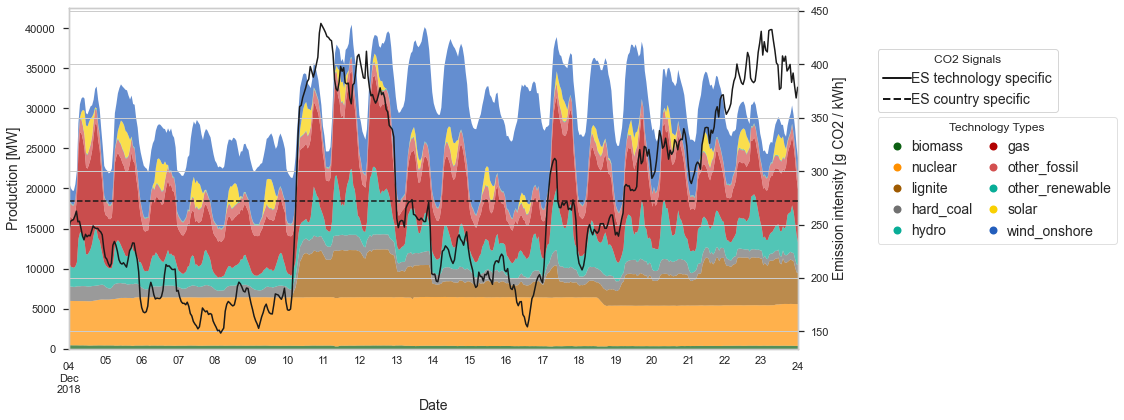

In [49]:
start = datetime.date(2018, 12, 4)
end = datetime.date(2018, 12, 24)

fig = plot_production_profile_2(entsoe_gen_type, Carbon_intensitiy_entsoe_gen_type, Carbon_intensitiy_entsoe_gen_type_mean, 'ES', start, end)

In [50]:
fig.savefig(os.path.join(output_directory_path + '/CO2_signal_example_DE.png'))

C:\Users\Freddy\.conda\envs\Lecture\lib\site-packages\ipykernel_launcher.py:66: MatplotlibDeprecationWarning: Calling add_axes() without argument is deprecated since 3.3 and will be removed two minor releases later. You may want to use add_subplot() instead.


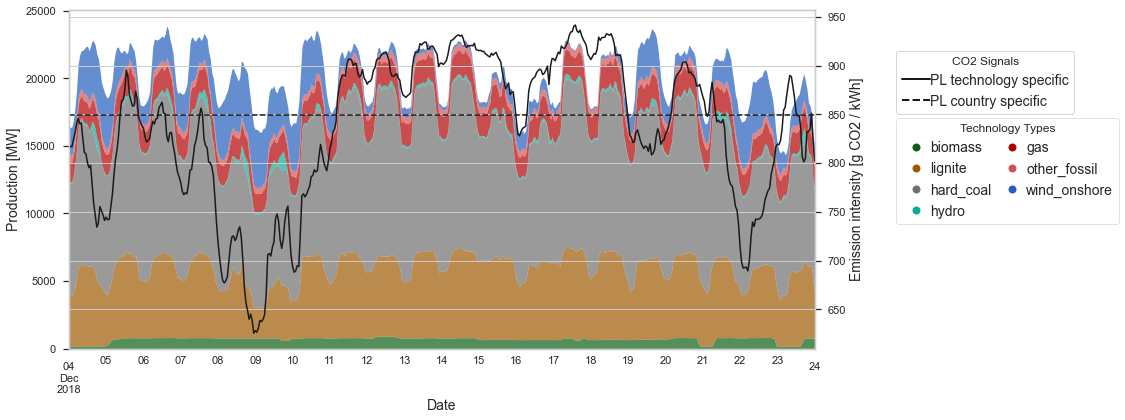

In [51]:
start = datetime.date(2018, 12, 4)
end = datetime.date(2018, 12, 24)

fig = plot_production_profile_2(entsoe_gen_type, Carbon_intensitiy_entsoe_gen_type, Carbon_intensitiy_entsoe_gen_type_mean, 'PL', start, end)

In [52]:
fig.savefig(os.path.join(output_directory_path + '/CO2_signal_example_PL.png'))

C:\Users\Freddy\.conda\envs\Lecture\lib\site-packages\ipykernel_launcher.py:66: MatplotlibDeprecationWarning: Calling add_axes() without argument is deprecated since 3.3 and will be removed two minor releases later. You may want to use add_subplot() instead.


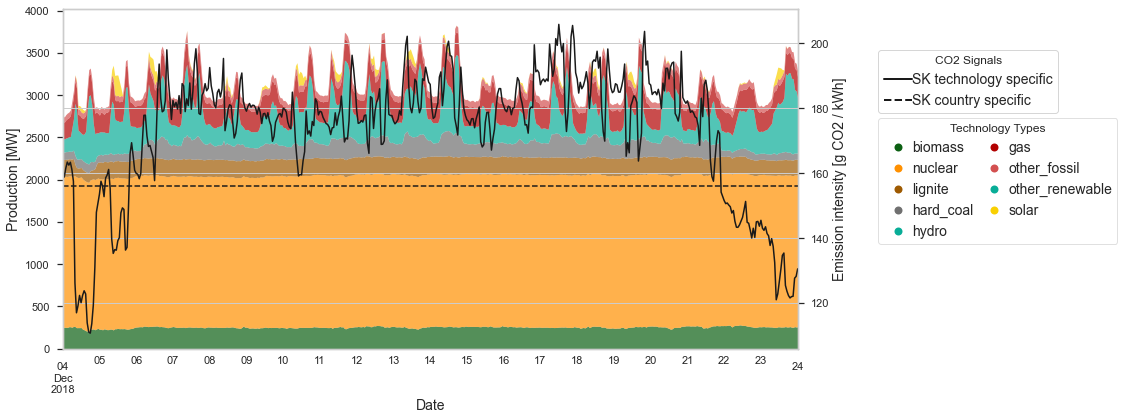

In [53]:
start = datetime.date(2018, 12, 4)
end = datetime.date(2018, 12, 24)

fig = plot_production_profile_2(entsoe_gen_type, Carbon_intensitiy_entsoe_gen_type, Carbon_intensitiy_entsoe_gen_type_mean, 'SK', start, end)

C:\Users\Freddy\.conda\envs\Lecture\lib\site-packages\ipykernel_launcher.py:66: MatplotlibDeprecationWarning: Calling add_axes() without argument is deprecated since 3.3 and will be removed two minor releases later. You may want to use add_subplot() instead.


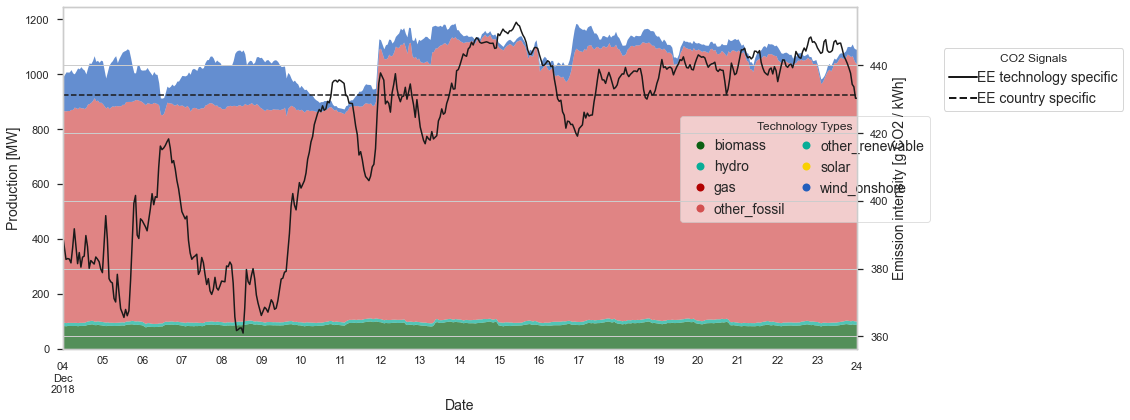

In [124]:
start = datetime.date(2018, 12, 4)
end = datetime.date(2018, 12, 24)

fig = plot_production_profile_2(entsoe_gen_type, Carbon_intensitiy_entsoe_gen_type, Carbon_intensitiy_entsoe_gen_type_mean, 'EE', start, end)

### CO2 Duration Curves

In [55]:
countries = Carbon_intensitiy_entsoe_gen_type[EF.index.levels[0]].columns

In [125]:
countries

Index(['AT', 'BE', 'CZ', 'DE', 'DK', 'ES', 'FI', 'FR', 'GB', 'GR', 'HU', 'IE',
       'IT', 'NL', 'PL', 'PT', 'RO', 'SE', 'SK'],
      dtype='object', name='region')

In [56]:
Carbon_intensitiy_entsoe_gen_type

region,AT,BE,BG,CH,CY,CZ,DE,DK,EE,ES,...,ME,NL,NO,PL,PT,RO,RS,SE,SI,SK
utc_timestamp,,,,,,,,,,,,,,,,,,,,,
2018-01-01 00:00:00+00:00,80.420496,84.171452,454.077703,0.0,476.331413,485.194905,210.652002,98.681797,426.150700,92.247004,...,1194.867552,136.089034,10.428197,667.852431,137.015489,383.563632,889.821559,11.447693,269.671708,150.797462
2018-01-01 01:00:00+00:00,79.951546,88.842430,454.254734,0.0,471.255494,481.940989,209.520812,115.839868,422.609722,102.812742,...,1194.867552,135.589507,11.151664,650.990114,141.577108,374.767251,913.739034,11.562233,264.472790,149.583070
2018-01-01 02:00:00+00:00,85.504006,92.496630,455.118326,0.0,446.428967,478.541305,206.288323,108.199338,425.378810,117.688629,...,1194.867552,133.536348,12.333899,640.740701,132.781588,393.938711,920.301544,10.752087,245.656888,144.007003
2018-01-01 03:00:00+00:00,90.095337,91.885964,454.628404,0.0,445.871864,481.466491,206.864155,109.825395,428.837454,117.057382,...,1194.867552,132.143525,12.333490,643.783696,138.217208,403.867663,900.826710,10.783414,252.997800,134.400879
2018-01-01 04:00:00+00:00,89.107178,92.765542,456.016339,0.0,467.979894,487.792190,204.806739,106.019696,427.777730,118.419040,...,1194.867552,132.178928,12.280398,634.564289,138.690471,408.137775,917.659813,10.671919,254.982589,137.207043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 19:00:00+00:00,190.777819,206.486526,602.470712,0.0,476.529377,634.027118,357.122772,138.660013,371.746340,188.405171,...,550.839509,497.567292,12.090894,756.799514,281.233564,369.218522,932.849652,13.616494,208.485195,136.247484
2018-12-31 20:00:00+00:00,191.512161,201.376645,619.048750,0.0,453.092285,636.040915,342.621730,138.010355,365.789967,191.784702,...,615.144869,495.223263,12.469608,753.850606,316.334175,365.686230,946.227235,13.945600,242.290846,138.244774
2018-12-31 21:00:00+00:00,191.774213,188.625727,618.747316,0.0,441.739573,597.342899,329.828346,128.478716,363.155762,191.274634,...,621.664209,499.068147,12.612087,740.385488,397.174737,408.362596,926.673873,14.324509,269.720130,144.714374


#### One Figure

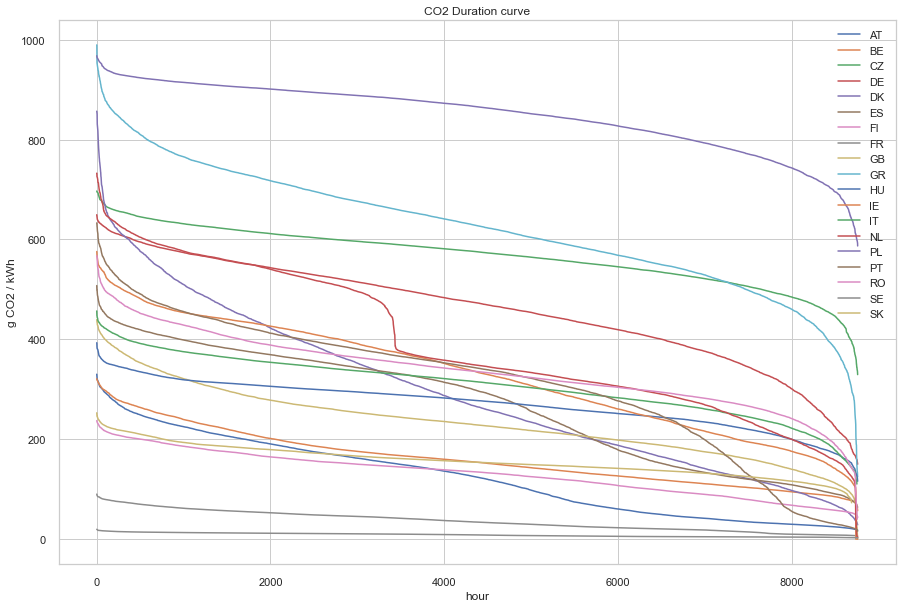

In [57]:
fig, ax = plt.subplots()

for i in countries:    
    ax.plot(range(0,8760), Carbon_intensitiy_entsoe_gen_type[i].sort_values(ascending=False), label = 'CO2 Duration curve')


    
ax.legend(countries ,loc='upper right')
ax.set_xlabel('hour')
ax.set_ylabel('g CO2 / kWh')
plt.title('CO2 Duration curve')
plt.show()

#### Multi sub Figures

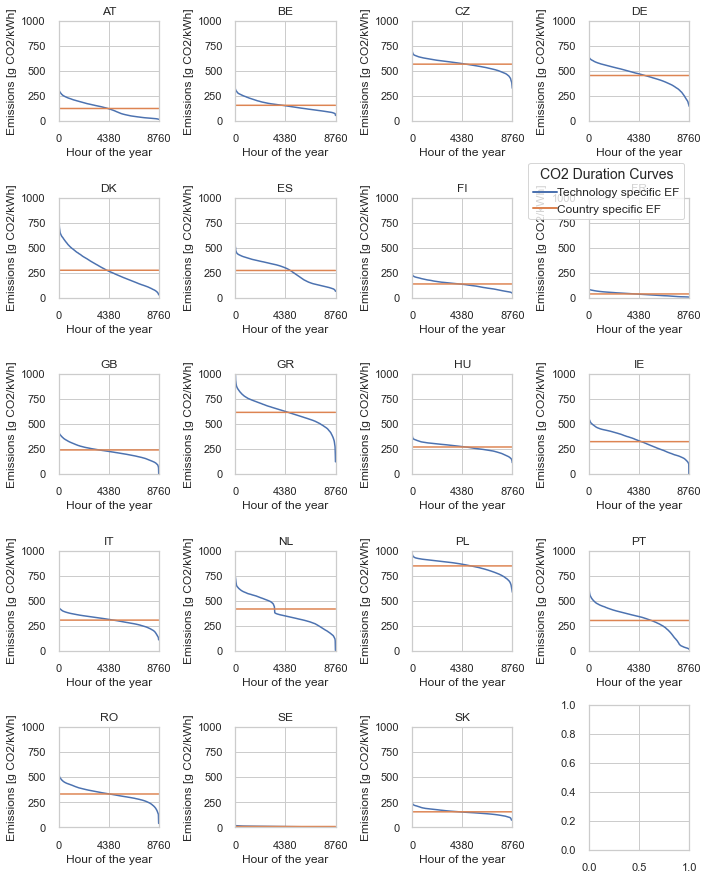

In [58]:
n_graphs = len(Carbon_intensitiy_entsoe_gen_type[EF.index.levels[0]].columns)
n_cols = 4
    
if n_graphs % n_cols == 0:
    n_rows = n_graphs // n_cols
else:
    n_rows = n_graphs // n_cols + 1
    
    
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)

#fig.delaxes(axes[3][4])

size = 2.5

fig.set_size_inches(size*n_cols,size*n_rows)
    
    
for i, country in enumerate(Carbon_intensitiy_entsoe_gen_type[EF.index.levels[0]].columns):
    i_row = i // n_cols
    i_col = i % n_cols
        
    ax = axes[i_row,i_col]
        
    ax.plot(range(0,8760), Carbon_intensitiy_entsoe_gen_type[country].sort_values(ascending=False))
    ax.plot(range(0,8760), ([mean_Carbon_intensitiy_entsoe_gen_type[country]]*8760))
    
    ax.set_title(country, fontsize=12)
    ax.set_xlim(0,8760)
    ax.set_ylim(0,1000)
    
    ax.set_xticks([0,4380,8760])
        
    ax.set_xlabel("Hour of the year", fontsize=12)
    ax.set_ylabel("Emissions [g CO2/kWh]", fontsize=12)
    ax.set_aspect(8.760)
    fig.tight_layout()

handles = [Line2D([0], [0], color='C0', lw=2),
           Line2D([0], [0], color='C1', lw=2)
           ]
    
labels = ['Technology specific EF','Country specific EF']
    
l2 = ax.legend(handles, labels,  loc='upper left', bbox_to_anchor=(1.10, 6.70),
                   handletextpad=0., columnspacing=0.5, ncol=1,
                   title='CO2 Duration Curves', fontsize=12, title_fontsize= 14, frameon=True)



In [59]:
fig.savefig(os.path.join(output_directory_path + '/CO2_duration_curve.png'),bbox_extra_artists=(l2,), bbox_inches='tight')

### Carbon Intensity Heat Map 

<AxesSubplot:xlabel='utc_timestamp', ylabel='region'>

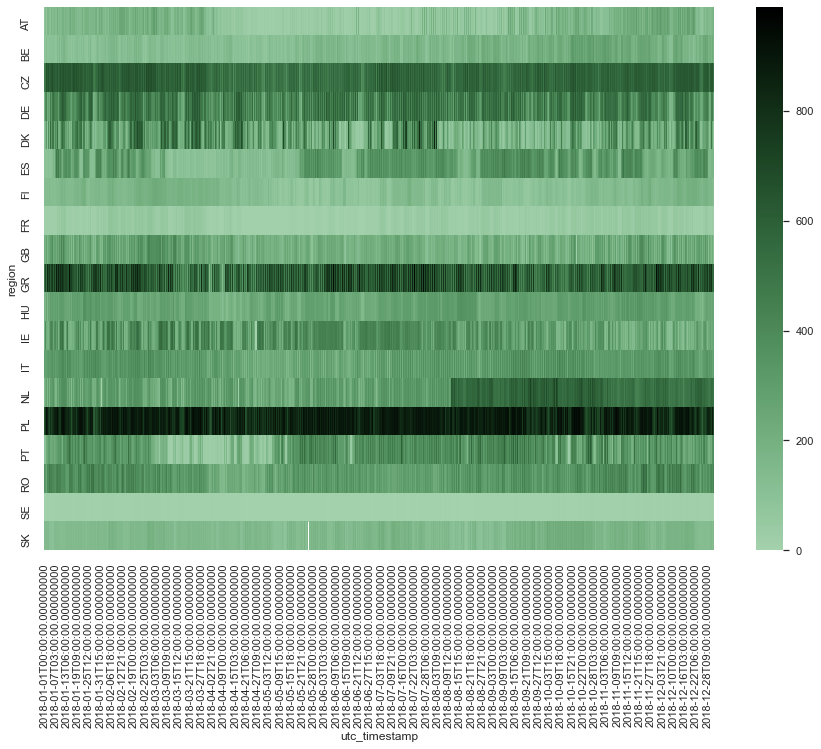

In [60]:
# all countries
sns.heatmap(Carbon_intensitiy_entsoe_gen_type[countries].transpose(), cmap=sns.cubehelix_palette(start=2, rot=0, dark=0, light=.75, reverse=False, as_cmap=True))

In [61]:
# use Germany as an aingle country example
df = Carbon_intensitiy_entsoe_gen_type['DE'].to_frame().copy()

In [62]:
df.head()

,DE
utc_timestamp,
2018-01-01 00:00:00+00:00,210.652002
2018-01-01 01:00:00+00:00,209.520812
2018-01-01 02:00:00+00:00,206.288323
2018-01-01 03:00:00+00:00,206.864155
2018-01-01 04:00:00+00:00,204.806739


In [63]:
# def names for the heat map
df['month'] = df.index.month_name()
df['day'] = df.index.day_name()
df['hour']=df.index.hour
df['date']=df.index.date
df.head()

,DE,month,day,hour,date
utc_timestamp,,,,,
2018-01-01 00:00:00+00:00,210.652002,January,Monday,0,2018-01-01
2018-01-01 01:00:00+00:00,209.520812,January,Monday,1,2018-01-01
2018-01-01 02:00:00+00:00,206.288323,January,Monday,2,2018-01-01
2018-01-01 03:00:00+00:00,206.864155,January,Monday,3,2018-01-01
2018-01-01 04:00:00+00:00,204.806739,January,Monday,4,2018-01-01


In [64]:
# group the values
df1 = df.groupby(['month', 'hour'],sort=False).agg(['mean'])
df1.columns=df1.columns.droplevel(0)
df1.reset_index(inplace=True)
df1.head()

,month,hour,mean
0,January,0,396.310358
1,January,1,393.371743
2,January,2,391.352062
3,January,3,394.477231
4,January,4,406.041264


In [65]:
# pandas pivot with multiple variables
heatmap_data = pd.pivot_table(df1, values='mean', index=['month'], columns='hour')
# print to see few rows and columns
print(heatmap_data.iloc[0:3, 0:3])

hour               0           1           2
month                                       
April     458.076486  454.220240  456.855053
August    516.128504  516.560176  520.905087
December  375.641494  374.214200  374.219854


In [66]:
months=df1.month.unique().tolist()
print(months)

['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']


In [67]:
heatmap_data=heatmap_data.loc[months]

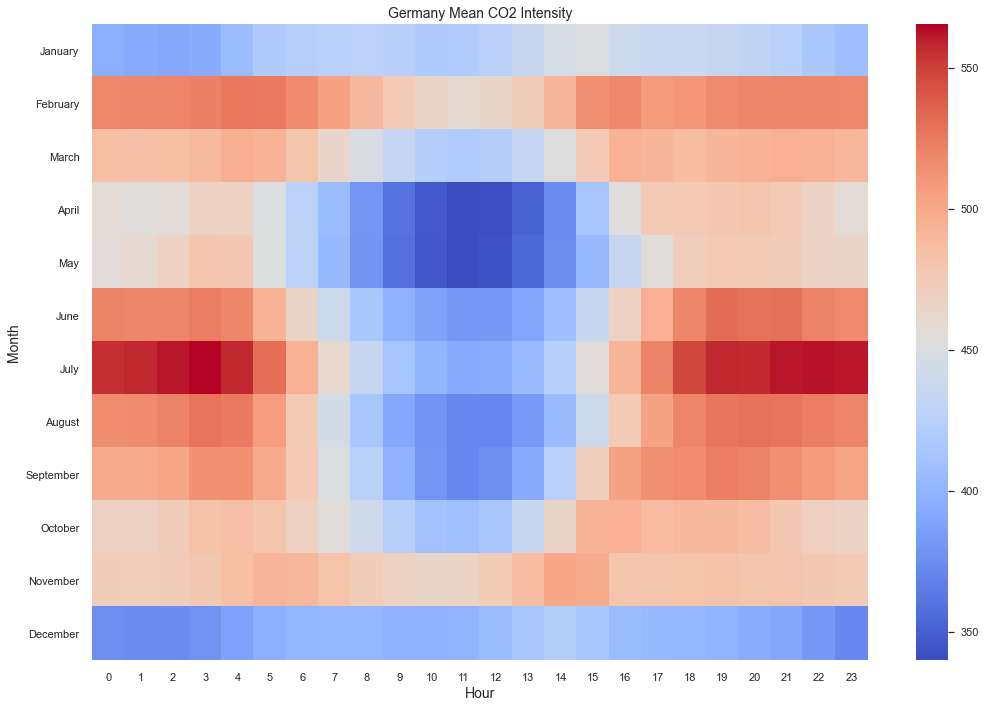

In [68]:
sns.heatmap(heatmap_data,cmap="coolwarm")
plt.xlabel("Hour", size=14)
plt.ylabel("Month", size=14)
plt.title("Germany Mean CO2 Intensity", size=14)
plt.tight_layout()

# ENTSO-E Statistical Factsheet 2018 in Comma Separated Value (CSV) format

In [69]:
def convert_ENTSOE_to_INATECH_type(ProductionTypeName):
    """
    Converts ENTSO-E Factsheet source names into INATECH technology type names.

    Parameters
    ----------
    ProductionTypeName : string
        ENTSO-E name of production type.

    Returns
    -------
    string
        INATECH names of production type.

    """
    
    return ProductionTypeName.replace({
            'Nuclear': 'nuclear',
            'Fossil Brown coal / Lignite': 'lignite',
            'Fossil Coal-derived gas': 'other_fossil',
            'Fossil Gas': 'gas',
            'Fossil Hard coal': 'hard_coal',
            'Fossil Oil': 'other_fossil',
            'Fossil Oil shale': 'other_fossil',
            'Fossil Peat': 'other_fossil',
            'Mixed fuels': 'other_fossil',
            'Other fossil fuels': 'other_fossil',
            'Hydro pure pumped storage': 'hydro',
            'Hydro mixed pumped storage ( non renewable part )': 'hydro',
            'Waste ( non renewable part )': 'other_fossil',
            'Other non-renewable': 'other_fossil',
            'Wind offshore': 'wind_offshore',
            'Wind onshore': 'wind_onshore',
            'Solar PV': 'solar',
            'Solar Thermal': 'solar',
            'Biomass': 'biomass',
            'Biogas': 'biomass',
            'Geothermal': 'other_renewable',
            'Renewable Waste': 'other_renewable',
            'Hydro Pure storage': 'hydro',
            'Hydro Run-of-river and pondage': 'hydro',
            'Hydro mixed pumped storage ( renewable part )': 'hydro',
            'Hydro Marine ( tidal / wave )': 'other_renewable',
            'Other renewable': 'other_renewable'}, inplace=False)

In [70]:
FACT = pd.read_csv(input_directory_path + '/entsoe-statistical-factsheet-2018-stacked.csv', index_col=[1], header=[0], parse_dates=True)

FACT.drop(['capacity_MW'], axis=1, inplace=True)

# set filter and apply filter to datat
filter = ['Fossil fuels','Total NGC','Renewable net generation','Non renewable net generation','Not identified']
    
FACT.query('source not in @filter', inplace=True)

FACT.source.replace({'Of which ':''}, regex=True, inplace=True)

# change ProductionTypeNames into INATECH technology type names
FACT.source = convert_ENTSOE_to_INATECH_type(FACT.source)

In [71]:
# reset index for groupby function
FACT.reset_index(inplace=True)
# group same production types
FACT = FACT.groupby(['source', 'year','country']).sum()
# set the old index for the dataframe
FACT = FACT.reset_index().set_index('year')

In [72]:
# convert to MWh
FACT['generation_TWh'] = FACT['generation_TWh'] * 1000000

In [73]:
FACT.rename(columns={'generation_TWh':'generation'}, inplace=True)

In [74]:
FACT

,source,country,generation
year,,,
2018-01-01,biomass,AL,0.0
2018-01-01,biomass,AT,0.0
2018-01-01,biomass,BA,0.0
2018-01-01,biomass,BE,3500000.0
2018-01-01,biomass,BG,300000.0
...,...,...,...
2018-01-01,wind_onshore,RS,100000.0
2018-01-01,wind_onshore,SE,16600000.0
2018-01-01,wind_onshore,SI,0.0


In [75]:
FACT =  pd.pivot_table(FACT, values='generation', index=FACT.index, columns=['country','source'])

In [76]:
# Create a dataframe with the EF for each country and technology. If no specific EF is available, we use the default EF .
EF_multi = {}

for i in FACT.columns:
    if i in EF:
        EF_multi[i] = EF[i]
    elif i[1] in EF_mean:
        EF_multi[i] = EF_mean[i[1]]
    else:
        EF_multi[i] = EF_default[i[1]]

In [77]:
# calculate emissions based on EF and generation per type
CO2_emission_FACT = FACT * EF_multi

In [78]:
# From the previously calculated emissions, an emission signal (g CO2 / kWh) can now be calculated for each country.
# Since emissions and generation are available per technology, they must first be grouped and summed. 
CO2_emission_FACT = (CO2_emission_FACT * 1000000).groupby(level=0, axis=1).sum()
Generation_FACT = (FACT * 1000).groupby(level=0, axis=1).sum()

Carbon_intensitiy_FACT = CO2_emission_FACT.div(Generation_FACT)

In [79]:


mean_Carbon_intensitiy_FACT = CO2_emission_FACT.loc['2018'].sum() / Generation_FACT.loc['2018'].sum()

In [80]:
mean_Carbon_intensitiy_FACT

country
AL      0.000000
AT    119.940988
BA    754.653190
BE    155.387895
BG    495.517100
CH     16.438976
CY    480.000000
CZ    569.719148
DE    456.218147
DK    262.267726
EE    431.372549
ES    272.297447
FI    137.110713
FR     37.561267
GB    242.959387
GR    521.666413
HR    167.938792
HU    269.926173
IE    320.707681
IS      0.000000
IT    307.241707
LT    100.902895
LU     62.821988
LV    202.313889
ME    464.670714
MK    675.554616
NL    418.005968
NO      9.065137
PL    847.354934
PT    303.512179
RO    348.366785
RS    849.942030
SE     12.819179
SI    328.631347
SK    155.919239
TR    520.104894
dtype: float64

# ENTSO-E Power Stats generation per technology CO2 Signal

In [81]:
MDV = pd.read_csv(input_directory_path + '/MDV_table.csv', index_col=[0], header=[0, 1], parse_dates=True)

In [82]:
MDV.loc['2018'].head(5)

Country                 AL                                             \
ProductionTypeName biomass  gas hard_coal       hydro lignite nuclear   
index                                                                   
2018-01-01             0.0  0.0       0.0  274.666667     0.0     0.0   
2018-02-01             0.0  0.0       0.0  331.000000     0.0     0.0   
2018-03-01             0.0  0.0       0.0  406.000000     0.0     0.0   
2018-04-01             0.0  0.0       0.0  372.666667     0.0     0.0   
2018-05-01             0.0  0.0       0.0  317.666667     0.0     0.0   

Country                                                      ...        TR  \
ProductionTypeName other_fossil other_renewable solar waste  ... hard_coal   
index                                                        ...             
2018-01-01                  0.0             0.0   0.0   0.0  ...   6112.94   
2018-02-01                  0.0             0.0   0.0   0.0  ...   5643.05   
2018-03-01                  0.0             0.0   0.0   0.0  ...   4826.60   
2018-04-01                  0.0             0.0   0.0   0.0  ...   4138.59   
2018-05-01                  0.0             0.0   0.0   0.0  ...   5732.74   

Country                                                                        \
ProductionTypeName        hydro  lignite nuclear other_fossil other_renewable   
index                                                                           
2018-01-01          1508.030000  3611.22     0.0       25.668      199.326667   
2018-02-01          1195.396667  3511.82     0.0       20.726      175.790000   
2018-03-01          2084.640000  3781.64     0.0       19.966      193.436667   
2018-04-01          2109.743333  3629.94     0.0       22.210      184.626667   
2018-05-01          2160.496667  3790.46     0.0       26.972      180.926667   

Country                                                      
ProductionTypeName   solar waste wind_offshore wind_onshore  
index                                                        
2018-01-01          241.15   0.0           0.0      1811.56  
2018-02-01          349.37   0.0           0.0      1673.63  
2018-03-01          381.19   0.0           0.0      2045.82  
2018-04-01          710.82   0.0           0.0      1164.12  
2018-05-01          730.28   0.0           0.0      1217.68  

[5 rows x 432 columns]

In [83]:
# convert to MWh
MDV = MDV * 1000

In [84]:
# Create a dataframe with the EF for each country and technology. If no specific EF is available, we use the default EF .
EF_multi = {}

for i in MDV.columns:
    if i in EF:
        EF_multi[i] = EF[i]
    elif i[1] in EF_mean:
        EF_multi[i] = EF_mean[i[1]]
    else:
        EF_multi[i] = EF_default[i[1]]

In [85]:
# calculate emissions based on EF and generation per type
CO2_emission_MDV = MDV * EF_multi

In [86]:
# From the previously calculated emissions, an emission signal (g CO2 / kWh) can now be calculated for each country.
# Since emissions and generation are available per technology, they must first be grouped and summed. 
CO2_emission_MDV = (CO2_emission_MDV * 1000000).groupby(level=0, axis=1).sum()
Generation_MDV = (MDV * 1000).groupby(level=0, axis=1).sum()

Carbon_intensitiy_MDV = CO2_emission_MDV.div(Generation_MDV)

In [87]:
#take only year 2018
Carbon_intensitiy_MDV = Carbon_intensitiy_MDV.loc['2018']

In [88]:


mean_Carbon_intensitiy_MDV = CO2_emission_MDV.loc['2018'].sum() / Generation_MDV.loc['2018'].sum()

In [89]:
MDV['DE'].sum().sum()

2090735376.6666665

# Compair Bottom Up and Top down

In [92]:
CI_top_down = pd.read_csv(os.path.join(processed_directory_path,'CI_MAP_AP_without_heat_top_down.csv'), index_col=0)
#CI_top_down.rename(columns={'UK':'GB'}, inplace = True)

In [93]:
CI_compar = pd.DataFrame()
CI_compar.index.rename('country',inplace=True)

In [94]:
CI_compar.index

Index([], dtype='object', name='country')

In [95]:
CI_compar['CI_top_down_ref'] = CI_top_down.loc[2018].filter(mean_Carbon_intensitiy_entsoe_gen_type.index.to_list())

In [96]:
CI_compar['CI_bottom_up'] = mean_Carbon_intensitiy_entsoe_gen_type.filter(CI_compar.index.to_list())
CI_compar['diff_bottom_up'] =CI_compar['CI_bottom_up'] -  CI_compar['CI_top_down_ref']
CI_compar['diff_bottom_up_pro'] = round((100 / CI_compar['CI_top_down_ref']) * CI_compar['diff_bottom_up'])

In [97]:
round(CI_compar, 2).sort_values(by='diff_bottom_up_pro')

,CI_top_down_ref,CI_bottom_up,diff_bottom_up,diff_bottom_up_pro
country,,,,
SE,39.53,8.90,-30.63,-77.0
LT,226.80,104.16,-122.64,-54.0
EE,936.41,431.37,-505.04,-54.0
FI,229.30,137.52,-91.78,-40.0
BE,241.20,158.36,-82.83,-34.0
CY,676.77,480.00,-196.77,-29.0
FR,51.14,37.73,-13.42,-26.0
NL,535.85,418.39,-117.46,-22.0
SK,178.54,155.92,-22.63,-13.0


In [98]:
round(CI_compar, 2).sort_values(by='diff_bottom_up_pro').to_csv(output_directory_path + '/CI_table.csv')

In [99]:



CI_compar['CI_MDV'] = mean_Carbon_intensitiy_MDV
CI_compar['CI_FACT'] = mean_Carbon_intensitiy_FACT

CI_compar['diff_MDV'] =CI_compar['CI_MDV'] -  CI_compar['CI_top_down_ref']
CI_compar['diff_FACT'] =CI_compar['CI_FACT'] -  CI_compar['CI_top_down_ref']


CI_compar['diff_MDV_pro'] = round((100 / CI_compar['CI_top_down_ref']) * CI_compar['diff_MDV'])

CI_compar['diff_FACT_pro'] = round((100 / CI_compar['CI_top_down_ref']) * CI_compar['diff_FACT'])


In [100]:
entsoe_gen_type['SE'].sum()/1000

variable
hydro           61000.0
nuclear         65800.0
other_fossil     2600.0
wind_onshore    16600.0
dtype: float64

In [101]:
mean_Carbon_intensitiy_entsoe_gen_type['SE'].sum()/1000

0.008904109589041094

In [102]:
CI_compar
#gründe warum CI_bottom up zu hoch
# DK wärme wird dort viel von Kraftwerken genutzt
# EE hat ganz viel other fossil (wir haben keine EF ausgerechnet)
# LT
# LV
# NO

,CI_top_down_ref,CI_bottom_up,diff_bottom_up,diff_bottom_up_pro,CI_MDV,CI_FACT,diff_MDV,diff_FACT,diff_MDV_pro,diff_FACT_pro
country,,,,,,,,,,
AT,101.585549,126.501862,24.916313,25.0,191.395847,119.940988,89.810298,18.355439,88.0,18.0
BE,241.196016,158.362921,-82.833095,-34.0,146.692330,155.387895,-94.503686,-85.808121,-39.0,-36.0
BG,470.385607,495.517100,25.131493,5.0,540.539431,495.517100,70.153824,25.131493,15.0,5.0
CY,676.774630,480.000000,-196.774630,-29.0,407.140434,480.000000,-269.634196,-196.774630,-40.0,-29.0
CZ,540.928590,569.719148,28.790558,5.0,584.393148,569.719148,43.464558,28.790558,8.0,5.0
DE,427.395935,456.218147,28.822212,7.0,468.975220,456.218147,41.579285,28.822212,10.0,7.0
DK,285.926768,274.576319,-11.350449,-4.0,269.649725,262.267726,-16.277043,-23.659042,-6.0,-8.0
EE,936.408342,431.372549,-505.035793,-54.0,275.288447,431.372549,-661.119895,-505.035793,-71.0,-54.0
ES,249.017380,272.297447,23.280067,9.0,289.159204,272.297447,40.141824,23.280067,16.0,9.0


Information about the data shown. The reference value shown here is not an official value, but can be used as a reference, since it is based on a documented and freely available method. 

In [103]:
energy_comp = pd.DataFrame()

energy_comp['MDV'] = MDV['2018'].sum()

In [104]:
energy_comp['entsoe'] = entsoe_gen_type.sum()

In [105]:
energy_comp['diff'] = energy_comp['MDV'] - energy_comp['entsoe']
energy_comp['missing_pro'] = round((100 / energy_comp['MDV']) * energy_comp['diff'])

In [106]:
energy_comp.loc['DE']

,MDV,entsoe,diff,missing_pro
ProductionTypeName,,,,
biomass,4.011219e+07,4.010000e+07,1.219000e+04,0.0
gas,8.733339e+07,8.730000e+07,3.339000e+04,0.0
hard_coal,7.294830e+07,7.290000e+07,4.830000e+04,0.0
hydro,8.370913e+06,2.510000e+07,-1.672909e+07,-200.0
lignite,1.348304e+08,1.348000e+08,3.039000e+04,0.0
nuclear,7.186123e+07,7.190000e+07,-3.877000e+04,-0.0
other_fossil,1.163948e+06,1.100000e+07,-9.836052e+06,-845.0
other_renewable,4.440100e+05,6.100000e+06,-5.655990e+06,-1274.0
solar,4.115653e+07,4.120000e+07,-4.347000e+04,-0.0


In [107]:
ember_CF = pd.read_csv(os.path.join(input_directory_path,'ember_EF.csv'))

# Plotting CI

In [108]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [109]:
world[world.name == 'Germany']

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
121,80594017,Europe,Germany,DEU,3979000.0,"POLYGON ((14.11969 53.75703, 14.35332 53.24817..."


In [110]:
import pycountry



In [111]:
pycountry.countries.search_fuzzy('Norway')

[Country(alpha_2='NO', alpha_3='NOR', name='Norway', numeric='578', official_name='Kingdom of Norway')]

In [112]:
import numpy as np


def do_fuzzy_search(country):
    try:
        result = pycountry.countries.search_fuzzy(country)
        return result[0].alpha_2
    except:
        return np.nan

world["country_code"] = world["name"].apply(lambda country: do_fuzzy_search(country))

In [113]:
world.set_index('country_code', inplace=True)

In [114]:
world['CI'] = Carbon_intensitiy_entsoe_gen_type.mean()

In [115]:
world[world.name == 'France']

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,CI
country_code,,,,,,,
FR,67106161,Europe,France,-99,2699000.0,"MULTIPOLYGON (((-51.65780 4.15623, -52.24934 3...",36.278544


<AxesSubplot:>

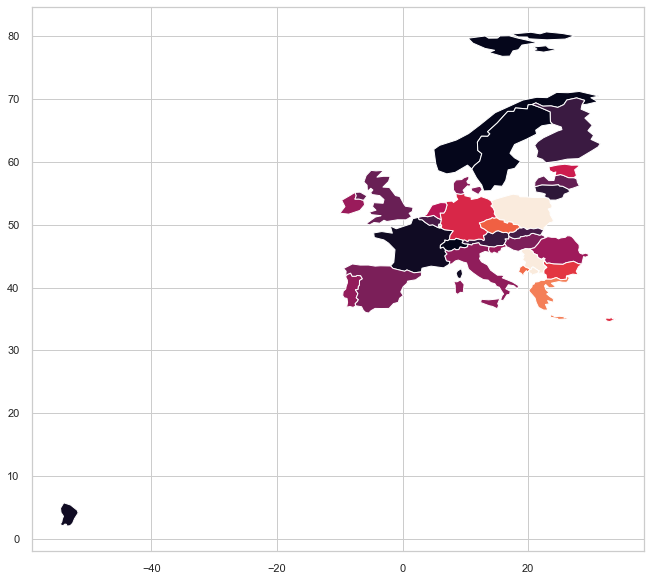

In [116]:
world.plot(column='CI')

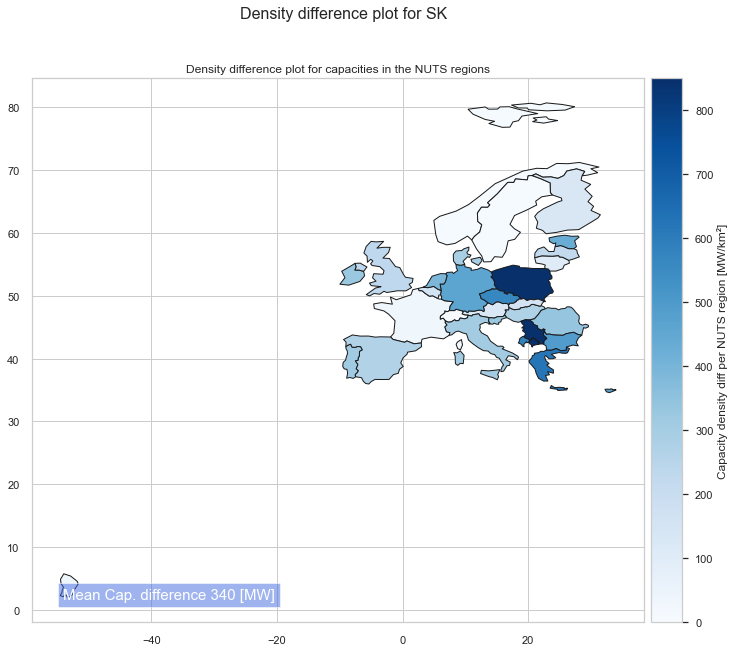

In [117]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(1, 1)

fig.suptitle("Density difference plot for " + country, fontsize=16)

divider = make_axes_locatable(ax)

cax = divider.append_axes("right", size="5%", pad=0.1)

world.plot(column='CI',
           ax=ax,
           cax=cax,
           legend=True,
           legend_kwds={'label': "Capacity density diff per NUTS region [MW/km²]", 'orientation': "vertical"},
           cmap='Blues',
           edgecolor='k')


ax.text(0.05, 0.05,'Mean Cap. difference ' + str(round(world.CI.mean())) + ' [MW]',\
        ha='left', va='center', transform=ax.transAxes, fontsize=15, color='white',\
        bbox={'facecolor': 'royalblue', 'alpha': 0.5, 'pad': 5})

ax.title.set_text('Density difference plot for capacities in the NUTS regions')


# Export final CO2 signals

In [ ]:
Carbon_intensitiy_entsoe_gen_type.to_csv(processed_directory_path + '/CI_bottom_up_methode.csv')
Carbon_intensitiy_entsoe_gen_type.to_csv(output_directory_path + '/CI_bottom_up_methode.csv')

# Plottting 

In [ ]:
CI_compar.index

In [ ]:
import numpy as np
# Create a dataframe
#value1=np.random.uniform(size=20)
#value2=value1+np.random.uniform(size=20)/4
#df = pd.DataFrame({'group':list(map(chr, range(65, 85))), 'value1':value1 , 'value2':value2 })

CI_compar

# Reorder it following the values of the first value:
ordered_df = CI_compar.sort_values(by='CI_bottom_up')
my_range=range(1,len(CI_compar.index)+1)
 
# The vertical plot is made using the hline function
# I load the seaborn library only to benefit the nice looking feature
import seaborn as sns
plt.hlines(y=my_range, xmin=ordered_df['CI_top_down_ref'], xmax=ordered_df['CI_bottom_up'], color='grey', alpha=0.4)
plt.scatter(ordered_df['CI_top_down_ref'], my_range, color='skyblue', alpha=1, label='CI_top_down_ref')
plt.scatter(ordered_df['CI_bottom_up'], my_range, color='green', alpha=0.4 , label='CI_bottom_up')
plt.legend()
 
# Add title and axis names
plt.yticks(my_range, ordered_df.index)
plt.title("Comparison of the CI_top_down_ref and the CI_bottom_up", loc='left')
plt.xlabel('Value of the variables')
#plt.ylabel(ordered_df.index)

In [ ]:
df